
#Conceptos sobre el sonido

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sebascarag/AI-SyntheticSound/blob/main/Playing%20Audio.ipynb)

El sonido es una forma de energía que se produce cuando hay vibraciones en el aire u otros medios de propagación, como el agua o los sólidos. Estas vibraciones generan ondas sonoras que se propagan a través del medio material y pueden ser percibidas por nuestros oídos.

Dependiendo del medio, el sonido se propaga a diferentes velocidades, por ejemplo, en el aire (medio más común para los humanos) 344 m/s, en cambio en el agua a 1.500 m/s o en el acero a 5.000 m/s, esto se da por la cercanía de las moleculas de cada material lo que permite una transimisión más rápida de la vibración. Sin embargo, el sonido no se propaga en el vacio, pues no hay medio material que vibre.

Otra propiedad interesante del sonido, es que se propaga de manera circular desde la fuente, es decir, en todas las direcciones. Claramente el audio puede ser direccionado, sin embargo, eso no quiere decir que sólo se propaga en una dirección sino que mantiene su forma de propagación circular pero con una intensidad mayor hacía el punto al que se está direccionando.

Para analizar un fragmento de audio lo que se hace es digitalizar la onda de sonido en una serie de números defindos por las siguientes propiedades:

* La intensidad de las vibraciones o lo que se conoce como la **Amplitud**: se refiere a la distancia máxima que alcanza una partícula del medio de propagación cuando se produce una vibración. Una mayor amplitud significa que las partículas se mueven con mayor desplazamiento y, por lo tanto, el sonido es más intenso o fuerte, así como también una menor amplitud se refiere a un menor desplazamiento o un sonido más suave. Esta amplitud muchas veces es calculada en decibelios (dB) medida que se relaciona con el nivel de volumen percibido por el oído humano.

* El número de ondas hechas por la señal en un segundo se llama **frecuencia**: se mide en hercios (Hz), donde un hercio equivale a un ciclo por segundo. La frecuencia está relacionada con la percepción de los diferentes tonos. Una frecuencia baja produce un sonido grave, mientras que una frecuencia alta genera un sonido agudo. El rango audible de frecuencia para los humanos se considera de 20 Hz a 20.000 Hz. Sin embargo, esta capacidad auditiva puede variar según la edad y la audición de cada individuo.

Algo importante a considerar es que los sonidos pueden ser composiciones de diferentes frecuencias a diferentes amplitudes, que se suman para crear señales compuestas con patrones más complejos.

In [ ]:
# Limpiar variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Al trabajar con archivos de audio en Python, frecuentemente encontramos librerías que al entregarle la ubicación del audio, nos entrega de devuelta dos valores:
* **Forma de la onda o waveform:** corresponde a una matriz unidimencional del tipo ndarray, que posee las amplitudes de onda a escala de -1 a 1.
* **Tasa de muestreo o sample_rate:** representa la cantidad de muestras tomadas por segundo del audio. Los valores de estas muestras se encuentran apilados en la variable anterior (forma de ondao o waveform)

In [ ]:
# Cargar archivos desde el equipo local
from google.colab import files

files.upload();

Saving 101415-3-0-2.wav to 101415-3-0-2.wav


In [ ]:
!pip install librosa
# Librería para generar gráficos (pyplot)
import matplotlib.pyplot as plt
# Librería para la manipulación y el análisis de datos (pandas)
import pandas as pd
# Librería para trabajar con vectores y matrices
import numpy as np
# Librería para análisis de audio que permite la lectura
import librosa
# Librería multimedia de Python, que entre otras funcionalidades, permite mostrar un reproductor de audio
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Cargar archivo de audio con la librería Librosa, más adeltante exploraremos otras características

# waveform: forma de la onda del tipo ndarray a escala de -1 a 1
# sample_rate: tasa de muestreo
waveform, sample_rate = librosa.load('/content/101415-3-0-2.wav', sr=None)

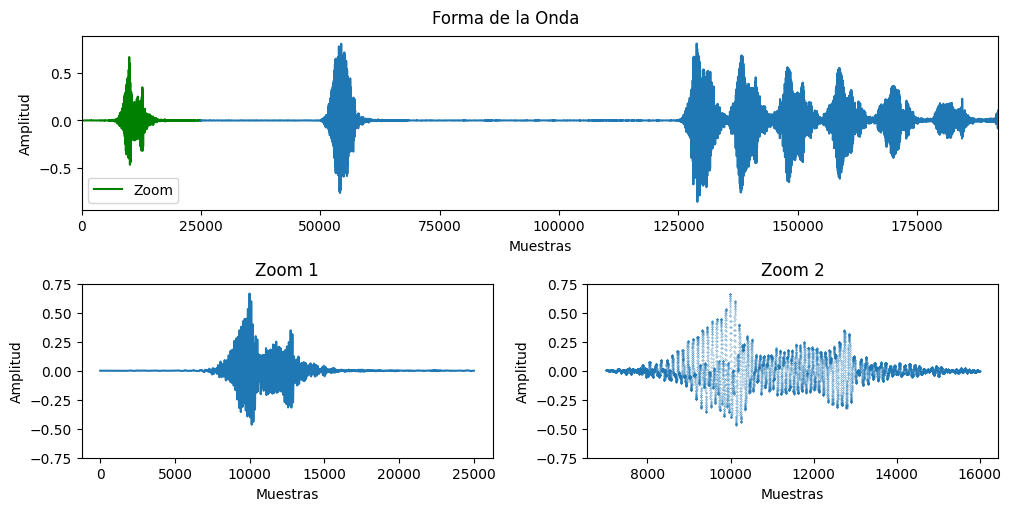

In [ ]:
# Presentar gráfico con la representación de la forma de la onda
fig, axd = plt.subplot_mosaic([['up', 'up'],['left', 'right']], constrained_layout=True)

fig.suptitle("Forma de la Onda")
fig.set_figheight(5)
fig.set_figwidth(10)

axd['up'].plot(range(0, 25000, 1), waveform[:25000], c='g', label='Zoom')
axd['up'].plot(range(25000, 192000, 1), waveform[25000:])
# axd['up'].set_title("Onda Completa")
axd['up'].set(xlabel="Muestras", ylabel="Amplitud")
axd['up'].set_xlim([0, 192000])
axd['up'].legend(loc='lower left')

# Se crea subgráfico enfocando una parte de la forma de onda total
axd['left'].plot(range(0, 25000, 1), waveform[:25000])
axd['left'].set_title("Zoom 1")
axd['left'].set(xlabel="Muestras", ylabel="Amplitud")
axd['left'].set_ylim([-0.75,0.75])

# Se crea subgráfico adicional enfocando aún más una parte de la forma de onda total
axd['right'].plot(range(7000, 16000, 1), waveform[7000:16000], '.', markersize=0.5)
axd['right'].set_title("Zoom 2")
axd['right'].set(xlabel="Muestras", ylabel="Amplitud")
axd['right'].set_ylim([-0.75,0.75])

Audio(data=waveform, rate=sample_rate)

In [ ]:
# Observamos algunos datos de los que se compone la variable waveform
pd.DataFrame(waveform, columns=['Amplitude']).head()

,Amplitude
0,-0.000153
1,-0.000153
2,-0.000183
3,-0.000153
4,-0.000183


In [ ]:
# Observamos estadisticas de la composición de la variable waveform
pd.DataFrame(waveform, columns=['Amplitude']).describe()

,Amplitude
count,192000.000000
mean,-0.000013
std,0.113300
min,-0.853485
25%,-0.001740
50%,-0.000061
75%,0.001404
max,0.806488


In [ ]:
# Obtenemos el tamaño, 48k muestras * 4 segundos
waveform.size

192000

Para conocer la duración del audio, podemos calcular la cantidad de porciones que fueron muestreadas del audio, realizando una división entre la variable `waveform` y `sample_rate`, así:

In [ ]:
# Calcular la duración del audio
duration = waveform.size / sample_rate

print("La duración del audio es:", duration, "segundos")

La duración del audio es: 4.0 segundos


In [ ]:
# Librosa, también ofrece una función parar calcular la duración del audio
duration = librosa.get_duration(y=waveform, sr=sample_rate)
print("La duración del audio es:", duration, "segundos")

La duración del audio es: 4.0 segundos


Otra librería con la que podemos cargar un archivo de audio y que además es muy usanda en redes neuronales es `torchaudio` (más adelante veremos un poco más información de esta), la cual también nos permite calcular la duración del audio, con algunas pequeñas diferencias pues está librería está especializada para trabjar con matrices multidimencionales (Tensor). La variable `waveform` tiene  la forma de una matriz de dos dimenciones donde la primer posición tiene la cantidad de canales del audio (1 mono, 2 estéreo, etc.) y la segunda, los valores de la forma de la onda

In [ ]:
import torch
import torchaudio
waveform, sample_rate = torchaudio.load('/content/101415-3-0-2.wav')

print(waveform.shape)

# Obtener la duración del audio
num_samples = waveform.size(1)
duration = num_samples / float(sample_rate)

# Imprimir la duración del audio en segundos
print("Duración del audio:", duration, "segundos")

torch.Size([1, 192000])
Duración del audio: 4.0 segundos


Ahora observemos nuevamente al gráfico de la forma de la onda, modificando el eje X con el tiempo en el que fueron tomadas las muestras

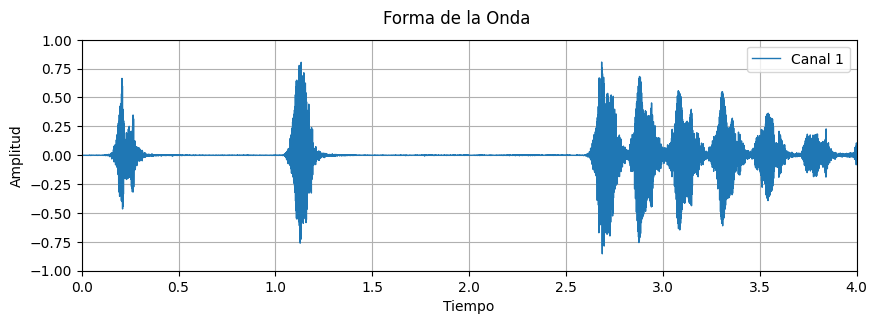

In [ ]:
waveformNp = waveform.numpy()
num_channels, num_frames = waveformNp.shape
time_axis = torch.arange(0, num_frames) / sample_rate

fig, axes = plt.subplots(num_channels, 1)
if num_channels == 1:
    axes = [axes]
for c in range(num_channels):
    axes[c].plot(time_axis, waveformNp[c], linewidth=1, label=f"Canal {c+1}")
    axes[c].grid(True)
    axes[c].set_ylabel(f"Canal {c+1}")
    axes[c].set_xlim([0,duration])
    axes[c].set_ylim([-1,1])
    axes[c].set(xlabel="Tiempo", ylabel="Amplitud")
    axes[c].legend()
fig.suptitle("Forma de la Onda")
fig.set_figheight(3)
fig.set_figwidth(10)
plt.show(block=False)

Audio(data=waveform, rate=sample_rate)

# Otras alternativas para trabajar en Python con archivos de audio

## Pydub
Pydub es una biblioteca para manipular audio con Python.

*   Puedes utilizarla para leer y reproducir archivos de audio en varios formatos, como MP3, WAV, OGG, FLAC y más.
*   Permite realizar varias operaciones de audio, como concatenar, cortar, mezclar y dividir archivos de audio, cambiar el volumen, la velocidad y la frecuencia de muestreo, aplicar efectos de sonido, entre otras.
*   Puede convertir fácilmente archivos de audio de un formato a otro.
*   Se integra bien con otras bibliotecas de Python, como NumPy, Scipy y Matplotlib, lo que puede ser útil para realizar análisis y visualizaciones de archivos de audio.

In [ ]:
!pip install pydub
from pydub import AudioSegment
from IPython.display import display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Lee el archivo de audio
pydub_audio = AudioSegment.from_file('/content/101415-3-0-2.wav')

# Visualiza el reproductor de audio
display(pydub_audio)

## Scipy

Es una biblioteca de Python para matemáticas, ciencias e ingeniería la cual no se utiliza específicamente para leer y reproducir audios, pero puede ser útil para el procesamiento de señales de audio y el análisis de datos de audio. Características:

* Transformada de Fourier: proporciona una implementación rápida de la transformada de Fourier, lo que permite analizar la frecuencia y la amplitud de señales de audio.

* Filtrado de señales: tiene herramientas para filtrar señales de audio, como el filtrado pasa bajo y el filtrado pasa alto, que se pueden utilizar para eliminar ruido de los archivos de audio.

* Análisis espectral: proporciona herramientas para calcular el espectro de potencia y el espectrograma de una señal de audio, lo que puede ser útil para analizar la distribución de frecuencias y la evolución del sonido a lo largo del tiempo.

* Análisis de forma de onda: proporciona herramientas para medir la amplitud, la frecuencia y la fase de una forma de onda de audio.

* Análisis de características de audio: se puede utilizar en conjunto con otras bibliotecas de Python para realizar análisis de características de audio, como la extracción de características de MFCC y el análisis de envolventes.

In [ ]:
from scipy.io import wavfile
from IPython.display import Audio

In [ ]:
# Cargar archivo WAV
scipy_samplerate, scipy_waveform = wavfile.read('/content/101415-3-0-2.wav')

# reproducir audio
Audio(scipy_waveform, rate=scipy_samplerate)

## Wave

Proporciona herramientas para leer y escribir archivos de audio en formato WAV (Waveform Audio File Format), que es uno de los formatos de archivo de audio más comunes. Si bien no proporciona herramientas para reproducir archivos de audio directamente, se puede combinar con otras bibliotecas para lograr la reproducción de archivos de audio, como en este caso AudioSegment. Algunas características que ofrece esta librería son:

* Lectura de archivos WAV: permite leer y acceder a los datos de audio y a la información de encabezado, como la frecuencia de muestreo, la profundidad de bits y el número de canales.

* Escritura de archivos WAV: permite escribir archivos WAV especificando la información de encabezado, como la frecuencia de muestreo, la profundidad de bits y el número de canales.

* Conversión de archivos de audio: puede convertir archivos de audio de un formato a otro, siempre y cuando sean compatibles con el formato WAV.

* Manipulación de datos de audio: proporciona herramientas para manipular los datos de audio, como la división de archivos de audio en partes más pequeñas, la mezcla de archivos de audio y la eliminación de silencios en los archivos de audio.

In [ ]:
!pip install pydub
import wave
from pydub import AudioSegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# abrir archivo de audio
wav_file = wave.open('/content/101415-3-0-2.wav', mode='rb')

# leer los datos del audio
wav_audio_data_bytes = wav_file.readframes(wav_file.getnframes())

# crear objeto AudioSegment
# AudioSegments es un objeto *inmutable* que representa segmentos de audio que
# se pueden manipular usando código python.
# python: trata sus tipos de datos como mutables o inmutables,
# mutable inmutable: el valor puede cambiar después de creado,
# inmutable: el valor no puede cambiar después de creado.

wav_audio_segment = AudioSegment(
    data=wav_audio_data_bytes,
    sample_width=wav_file.getsampwidth(),
    channels=wav_file.getnchannels(),
    frame_rate=wav_file.getframerate()
)

# Visualiza el reproductor de audio
display(wav_audio_segment) # NO SE PODRÍA HACER SIMPLEMENTE CON "Audio"?

## Soundfile
Proporciona una manera fácil de leer y escribir archivos de audio en una variedad de formatos. Además, se integra bien con NumPy, lo que facilita el procesamiento de señales de audio.

* Lectura de archivos de audio: `soundfile.read()` permite leer archivos de audio en varios formatos, incluyendo WAV, AIFF, FLAC y MP3. La función devuelve una matriz de audio y la tasa de muestreo (en Hz) del archivo.

* Escritura de archivos de audio: `soundfile.write()` permite escribir archivos de audio en varios formatos, incluyendo WAV, AIFF y FLAC.

* Obtención de información sobre los archivos de audio: `soundfile.info()` obtener información detallada sobre un archivo de audio, incluyendo su duración, el número de canales, la tasa de muestreo, el formato y la codificación.

* Normalización de archivos de audio: `soundfile.normalize()` normalizar el nivel de amplitud de un archivo de audio, lo que puede ser útil para corregir archivos de audio que tienen diferentes niveles de volumen.

* Conversión de formatos de archivo: `soundfile.convert()` convertir un archivo de audio de un formato a otro, como de WAV a FLAC o de AIFF a WAV.

* Recorte y concatenación de archivos de audio: también proporciona funciones para recortar y concatenar archivos de audio, lo que puede ser útil para crear clips de audio personalizados.

* Procesamiento de señales de audio: se integra bien con NumPy, lo que permite aplicar fácilmente diversas operaciones de procesamiento de señales de audio a los datos de audio cargados. Por ejemplo, se puede aplicar un filtro de paso bajo o paso alto a la señal, aplicar una transformada de Fourier para obtener la representación en el dominio de la frecuencia de la señal, o calcular características de la señal, como la energía o el espectro de frecuencia.

In [ ]:
!pip install soundfile
import soundfile as sf
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Lee el archivo de audio
sf_audio, sf_samplerate = sf.read('/content/101415-3-0-2.wav')

# reproducir audio
Audio(sf_audio, rate=sf_samplerate)

## Librosa
Es una biblioteca para análisis de audio que proporciona una variedad de funciones para leer, escribir y manipular archivos de audio.

* Lectura de archivos de audio: permite leer archivos de audio en varios formatos, incluyendo WAV, MP3 y OGG. La función devuelve una matriz de audio y la tasa de muestreo (en Hz) del archivo.

* Análisis de audio: proporciona una amplia gama de herramientas para analizar características de audio como el espectrograma, el tempo, el tono y la energía. Estas características son útiles para la extracción de información útil de la señal de audio.

* Transformadas de Fourier: también proporciona funciones para calcular transformadas de Fourier de tiempo corto (STFT) y transformadas de Fourier de tiempo corto inverso (ISTFT). Estas transformadas son útiles para el análisis y la manipulación de señales de audio.

* Extracción de características: proporciona una amplia gama de funciones para extraer características de señales de audio, como el espectrograma, la mel-espectrograma, el croma y el tempo. Estas características son útiles para el análisis de audio, como la clasificación, el reconocimiento de patrones y la recuperación de información musical.

* Procesamiento de audio: Librosa también permite aplicar diferentes efectos de audio, como cambiar la velocidad de la señal, cambiar la tonalidad, eliminar ruido y reverberación.

* Análisis de audio avanzado: La biblioteca también proporciona funciones avanzadas para el análisis de audio, como la descomposición en componentes independientes (ICA), la separación de fuentes y la estimación de pitch.

* Integración con otras bibliotecas: Librosa se integra bien con otras bibliotecas de Python para el procesamiento de señales de audio, como NumPy y SciPy, lo que permite aplicar fácilmente diversas operaciones de procesamiento de señales de audio a los datos de audio cargados.

In [ ]:
!pip install librosa
import librosa
from IPython.display import Audio

In [ ]:
# Cargar el archivo de audio

# Si no se define el parametro SR, por defecto librosa realiza un cambio de frecuencia de muestreo
# del audio original a 22050; al usar el parametro sr=None, definimos que se conserve la
# frecuencia de muestreo orginal del audio
lib_audio, lib_samplerate = librosa.load('/content/101415-3-0-2.wav', sr=None)

# Reproducir el archivo de audio
Audio(data=lib_audio, rate=lib_samplerate)

## Torchaudio

Es una biblioteca de procesamiento de audio basada en PyTorch, diseñada para ser utilizada en tareas de aprendizaje automático. Ofrece muchas características avanzadas, como la posibilidad de aplicar transformaciones de audio y trabajar con formatos de audio especializados. Algunas de sus características:

* Carga y guardado de archivos de audio en varios formatos, incluyendo WAV, MP3 y FLAC.
* Conversión de frecuencia de muestreo y formatos de audio.
* Generación de espectrogramas, señales de tiempo-frecuencia y otros tipos de representaciones de audio.
* Extracción de características de audio, como MFCCs (coeficientes cepstrales de frecuencia mel), espectro de mel, mel-cepstrum, entre otros.
* Manipulación de formas de onda de audio, como cortar, recortar, mezclar, cambiar el volumen, entre otros.
* Visualización de formas de onda y espectrogramas de audio.
* Procesamiento de señales de audio en tiempo real mediante el uso de buffers de audio.

In [ ]:
import torch
import torchaudio
from IPython.display import Audio

In [ ]:
# Cargar archivo de audio
torch_waveform, torch_sample_rate = torchaudio.load('/content/101415-3-0-2.wav')

# Reproducir el archivo de audio
Audio(data=torch_waveform, rate=torch_sample_rate)

#Resampy
Esta biblioteca no se utiliza para reproducir audio, sino para realizar resampling (cambio de frecuencia de muestreo) en señales de audio. Por lo tanto, no se puede utilizar para reproducir un archivo de audio. Sin embargo, se puede utilizar junto con otras bibliotecas de procesamiento de audio como librosa o soundfile para cargar y procesar señales de audio.

La frecuencia de muestreo es la cantidad de veces que se toma una medición de la señal analógica y se convierte en un valor digital por segundo.

El cambio de la frecuencia de muestreo se refiere a la acción de alterar la frecuencia de muestreo original de una señal de audio. En algunas situaciones, puede ser necesario cambiar la frecuencia de muestreo de una señal de audio. Por ejemplo, algunos dispositivos de audio pueden tener una frecuencia de muestreo fija y no ser compatible con la frecuencia de muestreo de un archivo de audio determinado. En tales casos, se puede utilizar una técnica de resampling para cambiar la frecuencia de muestreo de la señal de audio para que sea compatible con el dispositivo de audio.

También puede ser necesario cambiar la frecuencia de muestreo para fines de procesamiento de señales de audio, como análisis de frecuencia, filtrado o reducción de ruido. En estos casos, una técnica de resampling puede utilizarse para adaptar la señal de audio a los requisitos del procesamiento que se realizará.

In [ ]:
!pip install resampy
import librosa
import resampy
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Cargar archivo de audio
re_lib_data, re_lib_samplerate = librosa.load('/content/101415-3-0-2.wav', sr=None)

# Cambiar la frecuencia de muestreo
re_new_sr = 22050
re_resampled = resampy.resample(re_lib_data, re_lib_samplerate, re_new_sr)

# Reproducir el archivo de audio resampleado
Audio(data=re_resampled, rate=re_new_sr)
